In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tkinter as tk

from IPython.display import display
from itertools import combinations
import matplotlib.pyplot as plt




from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Ganti dengan jalur file Anda
file_path = "C:/Project_SPPK_Kopi.csv"  # Windows
# file_path = "/home/user/data/Project_SPPK_Kopi.csv"  # Linux/Mac

# Membaca file CSV
df = pd.read_csv(file_path, sep=';', on_bad_lines='warn')

# Menampilkan beberapa data
print(df.head())

                                      Data Transaksi
0  Kopsu Friends, Espresso, Americano, Long Black...
1   Kopsu Friends, Espresso, Americano, Vietnam Drip
2  Americano, Long Black, Cappucino, Caffe Late, ...
3  Kopsu Friends, Long Black, Cappucino, V60, Vie...
4  Espresso, Cappucino, Caffe Late, Mochaccino, V...


,No.,Data Transaksi
0,1,"Kopsu Friends, Espresso, Americano, Long Black..."
1,2,"Kopsu Friends, Espresso, Americano, Vietnam Drip"
2,3,"Americano, Long Black, Cappucino, Caffe Late, ..."
3,4,"Kopsu Friends, Long Black, Cappucino, V60, Vie..."
4,5,"Espresso, Cappucino, Caffe Late, Mochaccino, V..."
5,6,"Kopsu Friends, Espresso, Americano, Long Black..."
6,7,"Espresso, Caffe Late, Mochaccino, V60, French ..."
7,8,"Kopsu Friends, Long Black, Mochaccino, Vietnam..."
8,9,"Kopsu Friends, Espresso, Americano, Cappucino,..."
9,10,"Americano, Long Black, Caffe Late, Mochaccino,..."


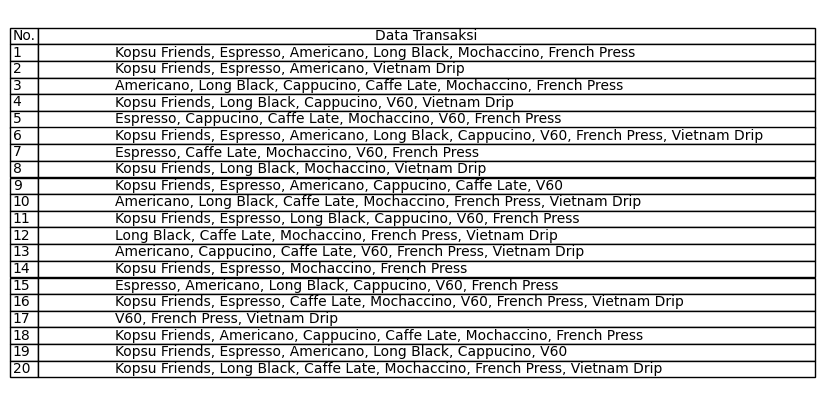

In [3]:




# Baca data dari CSV
df = pd.read_csv(file_path, sep=';', on_bad_lines='warn')

# Tambahkan kolom nomor urut
df.insert(0, "No.", range(1, len(df) + 1))

# Tampilkan DataFrame langsung di output Colab
display(df)

# Opsi: Visualisasi tabel menggunakan matplotlib
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='left',  # Rata kiri
    loc='center'
                  )


table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df.columns))))
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Data Transaksi  20 non-null     object
dtypes: object(1)
memory usage: 288.0+ bytes


In [ ]:
# Periksa data awal
print("Data awal:")
print(df)

Data awal:
                                       Data Transaksi
0   Kopsu Friends, Espresso, Americano, Long Black...
1    Kopsu Friends, Espresso, Americano, Vietnam Drip
2   Americano, Long Black, Cappucino, Caffe Late, ...
3   Kopsu Friends, Long Black, Cappucino, V60, Vie...
4   Espresso, Cappucino, Caffe Late, Mochaccino, V...
5   Kopsu Friends, Espresso, Americano, Long Black...
6   Espresso, Caffe Late, Mochaccino, V60, French ...
7   Kopsu Friends, Long Black, Mochaccino, Vietnam...
8   Kopsu Friends, Espresso, Americano, Cappucino,...
9   Americano, Long Black, Caffe Late, Mochaccino,...
10  Kopsu Friends, Espresso, Long Black, Cappucino...
11  Long Black, Caffe Late, Mochaccino, French Pre...
12  Americano, Cappucino, Caffe Late, V60, French ...
13  Kopsu Friends, Espresso, Mochaccino, French Press
14  Espresso, Americano, Long Black, Cappucino, V6...
15  Kopsu Friends, Espresso, Caffe Late, Mochaccin...
16                    V60, French Press, Vietnam Drip
17  Kopsu Friends

In [ ]:
# Kolom menu yang akan digunakan
menu_list = ["Kopsu Friends", "Espresso", "Americano", "Long Black", "Cappucino", "Caffe Late", "Mochaccino", "V60", "French Press", "Vietnam Drip"]

# Membuat DataFrame kosong untuk hasil biner
df_binary = pd.DataFrame(columns=["ID"] + menu_list)

# Tambahkan kolom ID
df_binary["ID"] = range(1, len(df) + 1)

# Proses setiap transaksi dan pisahkan menu
for index, row in df.iterrows():
# Ambil daftar menu dari kolom 'Data Transaksi'
    transaksi = row["Data Transaksi"].split(", ")

    # Set nilai 1 untuk setiap menu yang dipesan
    df_binary.loc[index, menu_list] = [1 if menu in transaksi else 0 for menu in menu_list]

# Tampilkan hasil dalam format biner
print("\nData transaksi dalam format biner:")
print(df_binary)


Data transaksi dalam format biner:
    ID Kopsu Friends Espresso Americano Long Black Cappucino Caffe Late  \
0    1             1        1         1          1         0          0   
1    2             1        1         1          0         0          0   
2    3             0        0         1          1         1          1   
3    4             1        0         0          1         1          0   
4    5             0        1         0          0         1          1   
5    6             1        1         1          1         1          0   
6    7             0        1         0          0         0          1   
7    8             1        0         0          1         0          0   
8    9             1        1         1          0         1          1   
9   10             0        0         1          1         0          1   
10  11             1        1         0          1         1          0   
11  12             0        0         0          1         0    

,ID,Kopsu Friends,Espresso,Americano,Long Black,Cappucino,Caffe Late,Mochaccino,V60,French Press,Vietnam Drip
0,1,1,1,1,1,0,0,1,0,1,0
1,2,1,1,1,0,0,0,0,0,0,1
2,3,0,0,1,1,1,1,1,0,1,0
3,4,1,0,0,1,1,0,0,1,0,1
4,5,0,1,0,0,1,1,1,1,1,0
5,6,1,1,1,1,1,0,0,1,1,1
6,7,0,1,0,0,0,1,1,1,1,0
7,8,1,0,0,1,0,0,1,0,0,1
8,9,1,1,1,0,1,1,0,1,0,0
9,10,0,0,1,1,0,1,1,0,1,1


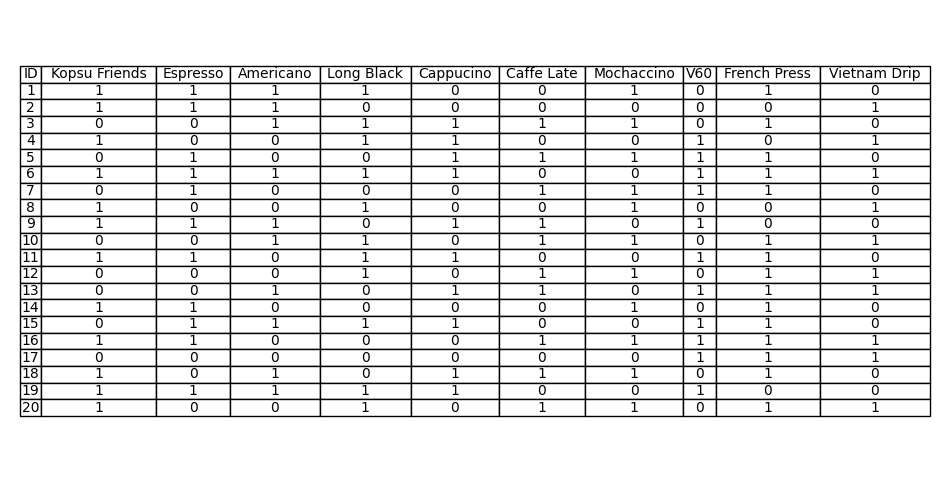

In [ ]:
# Baca data dari file CSV
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Project_SPPK_Kopi.csv', sep=';', on_bad_lines='warn')

# Daftar menu yang digunakan
menu_list = [
    "Kopsu Friends", "Espresso", "Americano", "Long Black",
    "Cappucino", "Caffe Late", "Mochaccino", "V60",
     "French Press", "Vietnam Drip"
]

# Membuat DataFrame kosong untuk hasil biner
df_binary = pd.DataFrame(columns=["ID"] + menu_list)

# Tambahkan kolom ID
df_binary["ID"] = range(1, len(df) + 1)

# Proses setiap transaksi dan pisahkan menu
for index, row in df.iterrows():
    # Ambil daftar menu dari kolom 'Data Transaksi'
    transaksi = row["Data Transaksi"].split(", ")
    # Set nilai 1 untuk setiap menu yang dipesan
    df_binary.loc[index, menu_list] = [1 if menu in transaksi else 0 for menu in menu_list]

# Tampilkan DataFrame biner di output Colab
display(df_binary)

# Visualisasi tabel biner menggunakan matplotlib
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')

# Buat tabel dengan data biner
table = ax.table(
    cellText=df_binary.values,
    colLabels=df_binary.columns,
    cellLoc='center',  # Data rata tengah
    loc='center'
)

# Atur font dan lebar kolom
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df_binary.columns))))

# Tampilkan tabel
plt.show()

In [ ]:
# Ubah nilai kopi menjadi simbol sesuai permintaan (1 menjadi 'X', 0 menjadi '-')
# Pisahkan kolom ID dari kolom lainnya
id_column = df_binary['ID']  # Simpan kolom ID untuk digunakan kembali
menu_columns = df_binary.drop(columns=['ID'])  # Hanya kolom menu yang akan diubah

# Transformasi kolom menu
df_transformed = menu_columns.replace({1: 'X', 0: '-'})

# Gabungkan kembali dengan kolom ID
df_transformed = pd.concat([id_column, df_transformed], axis=1)

# Hitung jumlah transaksi untuk setiap jenis kopi (jumlah 'X' di setiap kolom menu)
total_transactions = df_transformed.drop(columns=['ID']).apply(lambda col: col.value_counts().get('X', 0), axis=0)

# Tampilkan DataFrame transformasi
print("\nTransformasi Data:")
print(df_transformed)

# Menampilkan jumlah transaksi per kopi
print("\nJumlah Transaksi:")
for kopi, jml in total_transactions.items():
    print(f"{kopi}: {jml}")




Transformasi Data:
    ID Kopsu Friends Espresso Americano Long Black Cappucino Caffe Late  \
0    1             X        X         X          X         -          -   
1    2             X        X         X          -         -          -   
2    3             -        -         X          X         X          X   
3    4             X        -         -          X         X          -   
4    5             -        X         -          -         X          X   
5    6             X        X         X          X         X          -   
6    7             -        X         -          -         -          X   
7    8             X        -         -          X         -          -   
8    9             X        X         X          -         X          X   
9   10             -        -         X          X         -          X   
10  11             X        X         -          X         X          -   
11  12             -        -         -          X         -          X   
12  1

,ID,Kopsu Friends,Espresso,Americano,Long Black,Cappucino,Caffe Late,Mochaccino,V60,French Press,Vietnam Drip
0,1,X,X,X,X,-,-,X,-,X,-
1,2,X,X,X,-,-,-,-,-,-,X
2,3,-,-,X,X,X,X,X,-,X,-
3,4,X,-,-,X,X,-,-,X,-,X
4,5,-,X,-,-,X,X,X,X,X,-
5,6,X,X,X,X,X,-,-,X,X,X
6,7,-,X,-,-,-,X,X,X,X,-
7,8,X,-,-,X,-,-,X,-,-,X
8,9,X,X,X,-,X,X,-,X,-,-
9,10,-,-,X,X,-,X,X,-,X,X


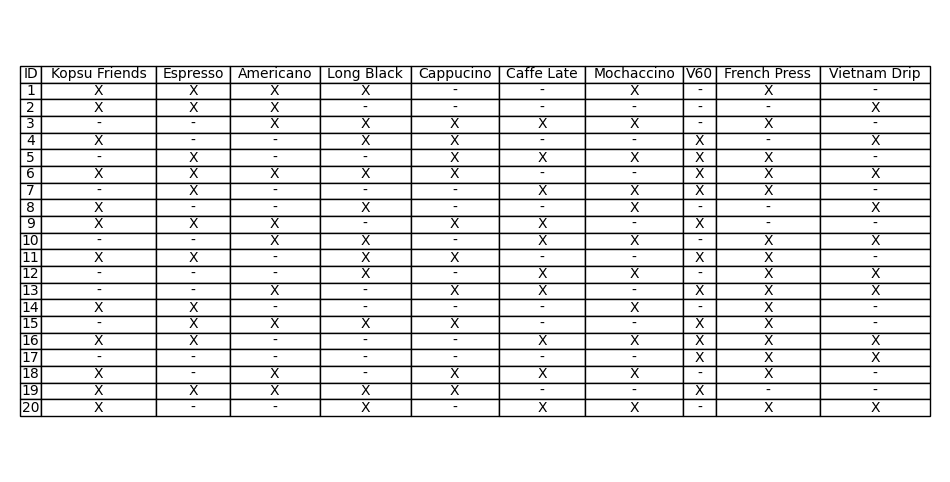


Total transaksi per menu:
Kopsu Friends: 12
Espresso: 11
Americano: 10
Long Black: 11
Cappucino: 10
Caffe Late: 10
Mochaccino: 11
V60: 11
French Press: 15
Vietnam Drip: 10


In [ ]:
# Daftar menu yang digunakan
menu_list = [
    "Kopsu Friends", "Espresso", "Americano", "Long Black",
    "Cappucino", "Caffe Late", "Mochaccino", "V60",
    "French Press", "Vietnam Drip"
]

# Baca data dari file CSV
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Project_SPPK_Kopi.csv', sep=';', on_bad_lines='warn')

# Membuat DataFrame kosong untuk hasil biner
df_binary = pd.DataFrame(columns=["ID"] + menu_list)

# Tambahkan kolom ID
df_binary["ID"] = range(1, len(df) + 1)

# Proses setiap transaksi dan pisahkan menu
for index, row in df.iterrows():
    # Ambil daftar menu dari kolom 'Data Transaksi'
    transaksi = row["Data Transaksi"].split(", ")
    # Set nilai 1 untuk setiap menu yang dipesan
    df_binary.loc[index, menu_list] = [1 if menu in transaksi else 0 for menu in menu_list]

# Transformasi nilai biner menjadi simbol
id_column = df_binary['ID']  # Simpan kolom ID untuk digunakan kembali
menu_columns = df_binary.drop(columns=['ID'])  # Hanya kolom menu yang akan diubah
df_transformed = menu_columns.replace({1: 'X', 0: '-'})  # Ubah 1 menjadi 'X' dan 0 menjadi '-'
df_transformed = pd.concat([id_column, df_transformed], axis=1)  # Gabungkan kembali kolom ID

# Tampilkan DataFrame hasil transformasi
display(df_transformed)

# Visualisasi tabel hasil transformasi menggunakan matplotlib
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')

# Buat tabel dengan data hasil transformasi
table = ax.table(
    cellText=df_transformed.values,
    colLabels=df_transformed.columns,
    cellLoc='center',  # Data rata tengah
    loc='center'
)

# Atur font dan lebar kolom
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df_transformed.columns))))

# Tampilkan tabel
plt.show()

# Hitung total transaksi untuk setiap menu
total_transactions = df_binary[menu_list].sum().to_dict()

# Cetak total transaksi per menu
print("\nTotal transaksi per menu:")
for kopi, jml in total_transactions.items():
    print(f"{kopi}: {jml}")

Modeling

Mencari Item set 1

In [ ]:
# Ubah nilai kopi menjadi simbol sesuai permintaan (1 menjadi 'X', 0 menjadi '-')
# Pastikan kolom ID tidak diproses
menu_columns = df_binary.drop(columns=['ID'])  # Hapus kolom ID dari data

# Menghitung support untuk setiap item dalam menu
support = menu_columns.sum() / len(menu_columns)

# Membuat DataFrame untuk menyimpan hasil support
support_df = pd.DataFrame({
    'Item': support.index,     # Nama item
    'Support': support.values  # Nilai support untuk setiap item
})

# Format nilai support menjadi dua desimal (menggunakan koma sebagai desimal)
support_df['Support'] = support_df['Support'].apply(lambda x: f"{x:.2f}".replace('.', ','))

# Menampilkan tabel hasil seleksi 1-itemset
print("Tabel Hasil Seleksi 1-itemset")
print(support_df.to_string(index=False))  # Menampilkan tabel tanpa indeks



Tabel Hasil Seleksi 1-itemset
         Item Support
Kopsu Friends    0,60
     Espresso    0,55
    Americano    0,50
   Long Black    0,55
    Cappucino    0,50
   Caffe Late    0,50
   Mochaccino    0,55
          V60    0,55
 French Press    0,75
 Vietnam Drip    0,50


,No,Item,Support
0,1,Kopsu Friends,"0,60"
1,2,Espresso,"0,55"
2,3,Americano,"0,50"
3,4,Long Black,"0,55"
4,5,Cappucino,"0,50"
5,6,Caffe Late,"0,50"
6,7,Mochaccino,"0,55"
7,8,V60,"0,55"
8,9,French Press,"0,75"
9,10,Vietnam Drip,"0,50"


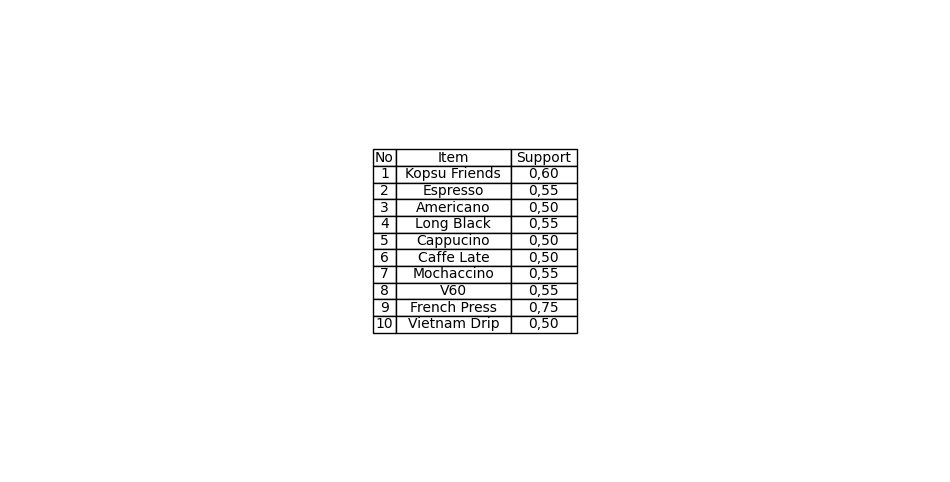


Tabel Hasil Seleksi 1-itemset:
 No          Item Support
  1 Kopsu Friends    0,60
  2      Espresso    0,55
  3     Americano    0,50
  4    Long Black    0,55
  5     Cappucino    0,50
  6    Caffe Late    0,50
  7    Mochaccino    0,55
  8           V60    0,55
  9  French Press    0,75
 10  Vietnam Drip    0,50


In [ ]:
# Daftar menu yang digunakan
menu_list = [
    "Kopsu Friends", "Espresso", "Americano", "Long Black",
    "Cappucino", "Caffe Late", "Mochaccino", "V60",
    "French Press", "Vietnam Drip"
]

# Baca data dari file CSV
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Project_SPPK_Kopi.csv', sep=';', on_bad_lines='warn')

# Membuat DataFrame kosong untuk hasil biner
df_binary = pd.DataFrame(columns=["ID"] + menu_list)

# Tambahkan kolom ID
df_binary["ID"] = range(1, len(df) + 1)

# Proses setiap transaksi dan pisahkan menu
for index, row in df.iterrows():
    # Ambil daftar menu dari kolom 'Data Transaksi'
    transaksi = row["Data Transaksi"].split(", ")
    # Set nilai 1 untuk setiap menu yang dipesan
    df_binary.loc[index, menu_list] = [1 if menu in transaksi else 0 for menu in menu_list]

# Pisahkan kolom ID dari kolom menu
id_column = df_binary['ID']  # Simpan kolom ID untuk digunakan kembali
menu_columns = df_binary.drop(columns=['ID'])  # Hanya kolom menu yang akan diubah

# Hitung support untuk setiap item dalam menu
support = menu_columns.sum() / len(menu_columns)

# Buat DataFrame untuk menyimpan hasil support
support_df = pd.DataFrame({
    'Item': support.index,  # Nama item
    'Support': support.values  # Nilai support untuk setiap item
})

# Format nilai support menjadi dua desimal (menggunakan koma sebagai desimal)
support_df['Support'] = support_df['Support'].apply(lambda x: f"{x:.2f}".replace('.', ','))

# Tambahkan kolom No untuk nomor urut
support_df['No'] = range(1, len(support_df) + 1)

# Atur urutan kolom agar No muncul di depan
support_df = support_df[['No', 'Item', 'Support']]

# Tampilkan DataFrame hasil support
display(support_df)

# Visualisasi tabel hasil support menggunakan matplotlib
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')

# Buat tabel dengan data hasil support
table = ax.table(
    cellText=support_df.values,
    colLabels=support_df.columns,
    cellLoc='center',  # Data rata tengah
    loc='center'
)

# Atur font dan lebar kolom
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(support_df.columns))))

# Tampilkan tabel
plt.show()

# Menampilkan tabel hasil seleksi 1-itemset
print("\nTabel Hasil Seleksi 1-itemset:")
print(support_df.to_string(index=False))

In [ ]:
# Menghitung jumlah transaksi total (jumlah baris data)
total_transaksi = len(df_transformed)

# Menghitung support untuk setiap item
support = total_transactions / total_transaksi  # Support = jumlah transaksi item / total transaksi

# Mengubah support menjadi persentase
support_percentage = support * 100

# Format confidence sebagai persentase dengan dua angka desimal atau bulat jika memungkinkan
formatted_confidence = support_percentage.apply(lambda x: f'{int(x)}%' if x.is_integer() else f'{x:.2f}%')

# Membuat DataFrame hasil
result_df = pd.DataFrame({
    'ID': range(1, len(total_transactions) + 1),  # ID dari 1 hingga jumlah item
    'Item': total_transactions.index,            # Nama item
    'Jumlah': total_transactions.values,         # Jumlah transaksi per item
    'Confidence': formatted_confidence           # Confidence dalam format persentase
})

# Menyusun kolom dengan urutan yang diinginkan
result_df = result_df[['ID', 'Item', 'Jumlah', 'Confidence']]

# Menampilkan hasil
print("Tabel Support setiap item")
print(result_df.to_string(index=False))  # Tampilkan tabel tanpa indeks tambahan



Tabel Support setiap item
 ID          Item  Jumlah Confidence
  1 Kopsu Friends      12        60%
  2      Espresso      11     55.00%
  3     Americano      10        50%
  4    Long Black      11     55.00%
  5     Cappucino      10        50%
  6    Caffe Late      10        50%
  7    Mochaccino      11     55.00%
  8           V60      11     55.00%
  9  French Press      15        75%
 10  Vietnam Drip      10        50%


,No,Item,Jumlah,Support (%)
0,1,Kopsu Friends,12,"60,00%"
1,2,Espresso,11,"55,00%"
2,3,Americano,10,"50,00%"
3,4,Long Black,11,"55,00%"
4,5,Cappucino,10,"50,00%"
5,6,Caffe Late,10,"50,00%"
6,7,Mochaccino,11,"55,00%"
7,8,V60,11,"55,00%"
8,9,French Press,15,"75,00%"
9,10,Vietnam Drip,10,"50,00%"


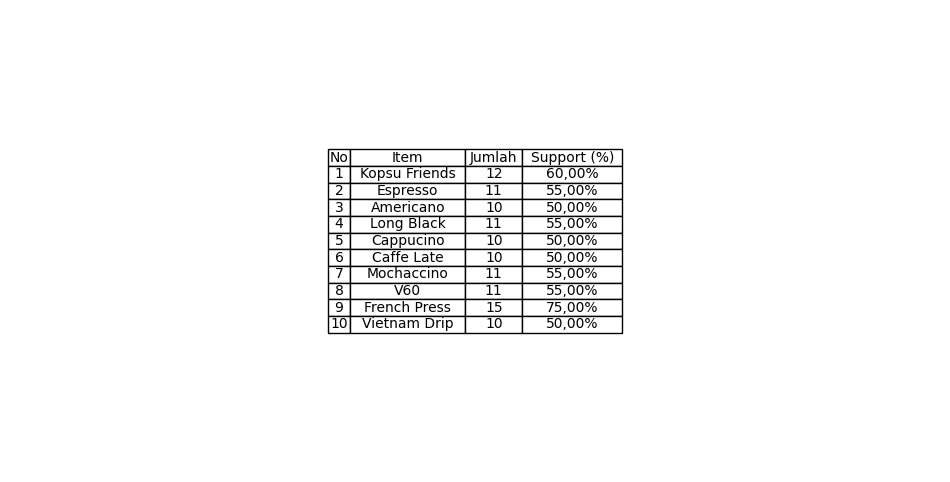


Tabel Support Setiap Item:
 No          Item Jumlah Support (%)
  1 Kopsu Friends     12      60,00%
  2      Espresso     11      55,00%
  3     Americano     10      50,00%
  4    Long Black     11      55,00%
  5     Cappucino     10      50,00%
  6    Caffe Late     10      50,00%
  7    Mochaccino     11      55,00%
  8           V60     11      55,00%
  9  French Press     15      75,00%
 10  Vietnam Drip     10      50,00%


In [ ]:
menu_list = [
      "Kopsu Friends", "Espresso", "Americano", "Long Black",
      "Cappucino", "Caffe Late", "Mochaccino", "V60",
      "French Press", "Vietnam Drip"
]

# Baca data dari file CSV
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Project_SPPK_Kopi.csv', sep=';', on_bad_lines='warn')

# Membuat DataFrame kosong untuk hasil biner
df_binary = pd.DataFrame(columns=["ID"] + menu_list)

# Tambahkan kolom ID
df_binary["ID"] = range(1, len(df) + 1)

# Proses setiap transaksi dan pisahkan menu
for index, row in df.iterrows():
    # Ambil daftar menu dari kolom 'Data Transaksi'
    transaksi = row["Data Transaksi"].split(", ")
    # Set nilai 1 untuk setiap menu yang dipesan
    df_binary.loc[index, menu_list] = [1 if menu in transaksi else 0 for menu in menu_list]

# Pisahkan kolom ID dari kolom menu
id_column = df_binary['ID']  # Simpan kolom ID untuk digunakan kembali
menu_columns = df_binary.drop(columns=['ID'])  # Hanya kolom menu yang akan diubah

# Hitung total transaksi (jumlah baris data)
total_transaksi = len(df)

# Hitung support untuk setiap item
support = menu_columns.sum() / total_transaksi

# Ubah support menjadi persentase
support_percentage = support * 100

# Buat DataFrame untuk menyimpan hasil support
result_df = pd.DataFrame({
   'Item': support.index,  # Nama item
   'Jumlah': menu_columns.sum().values,  # Jumlah kemunculan item
   'Support (%)': support_percentage.values  # Support dalam persentase
})

# Format support menjadi dua desimal (menggunakan koma sebagai desimal)
result_df['Support (%)'] = result_df['Support (%)'].apply(lambda x: f"{x:.2f}%".replace('.', ','))

# Tambahkan kolom No untuk nomor urut
result_df['No'] = range(1, len(result_df) + 1)

# Atur urutan kolom agar No muncul di depan
result_df = result_df[['No', 'Item', 'Jumlah', 'Support (%)']]

# Tampilkan DataFrame hasil support
display(result_df)

# Visualisasi tabel hasil support menggunakan matplotlib
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')

# Buat tabel dengan data hasil support
table = ax.table(
    cellText=result_df.values,
    colLabels=result_df.columns,
    cellLoc='center',  # Data rata tengah
    loc='center'
)

# Atur font dan lebar kolom
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(result_df.columns))))

# Tampilkan tabel
plt.show()

# Menampilkan tabel hasil support setiap item
print("\nTabel Support Setiap Item:")
print(result_df.to_string(index=False))


Mencari 2 itemset

In [ ]:
# Daftar item yang ada dalam kolom (menggunakan contoh total_transactions dari sebelumnya)
items = list(total_transactions.index)  # Mengambil nama item dari index Series total_transactions

# Total transaksi
total_transactions = len(df_binary)

# Buat kombinasi 2-itemset
from itertools import combinations
itemset_2 = list(combinations(items, 2))

# Hitung jumlah transaksi untuk setiap 2-itemset
itemset_2_counts = {}
for pair in itemset_2:
    # Cari transaksi yang mendukung kombinasi (transaksi yang mengandung kedua item dalam kombinasi)
    count = sum(
        (df_binary[pair[0]] == 1) & (df_binary[pair[1]] == 1)
    )
    itemset_2_counts[f"{pair[0]}, {pair[1]}"] = count

# Membuat DataFrame untuk hasil
import pandas as pd
data_tabel_itemset2 = {
    "Nama Itemset": list(itemset_2_counts.keys()),
    "Jumlah": list(itemset_2_counts.values()),
}

df_itemset2 = pd.DataFrame(data_tabel_itemset2)

# Menampilkan hasil
print("Tabel Itemset 2:")
print(df_itemset2.to_string(index=False))

Tabel Itemset 2:
               Nama Itemset  Jumlah
    Kopsu Friends, Espresso       8
   Kopsu Friends, Americano       6
  Kopsu Friends, Long Black       7
   Kopsu Friends, Cappucino       6
  Kopsu Friends, Caffe Late       4
  Kopsu Friends, Mochaccino       6
         Kopsu Friends, V60       6
Kopsu Friends, French Press       7
Kopsu Friends, Vietnam Drip       6
        Espresso, Americano       6
       Espresso, Long Black       5
        Espresso, Cappucino       6
       Espresso, Caffe Late       4
       Espresso, Mochaccino       5
              Espresso, V60       8
     Espresso, French Press       8
     Espresso, Vietnam Drip       3
      Americano, Long Black       6
       Americano, Cappucino       7
      Americano, Caffe Late       5
      Americano, Mochaccino       4
             Americano, V60       5
    Americano, French Press       7
    Americano, Vietnam Drip       4
      Long Black, Cappucino       6
     Long Black, Caffe Late       4
     Long B

,No,Itemset,Jumlah
0,1,Kopsu Friends & Espresso,8
1,2,Kopsu Friends & Americano,6
2,3,Kopsu Friends & Long Black,7
3,4,Kopsu Friends & Cappucino,6
4,5,Kopsu Friends & Caffe Late,4
5,6,Kopsu Friends & Mochaccino,6
6,7,Kopsu Friends & V60,6
7,8,Kopsu Friends & French Press,7
8,9,Kopsu Friends & Vietnam Drip,6
9,10,Espresso & Americano,6


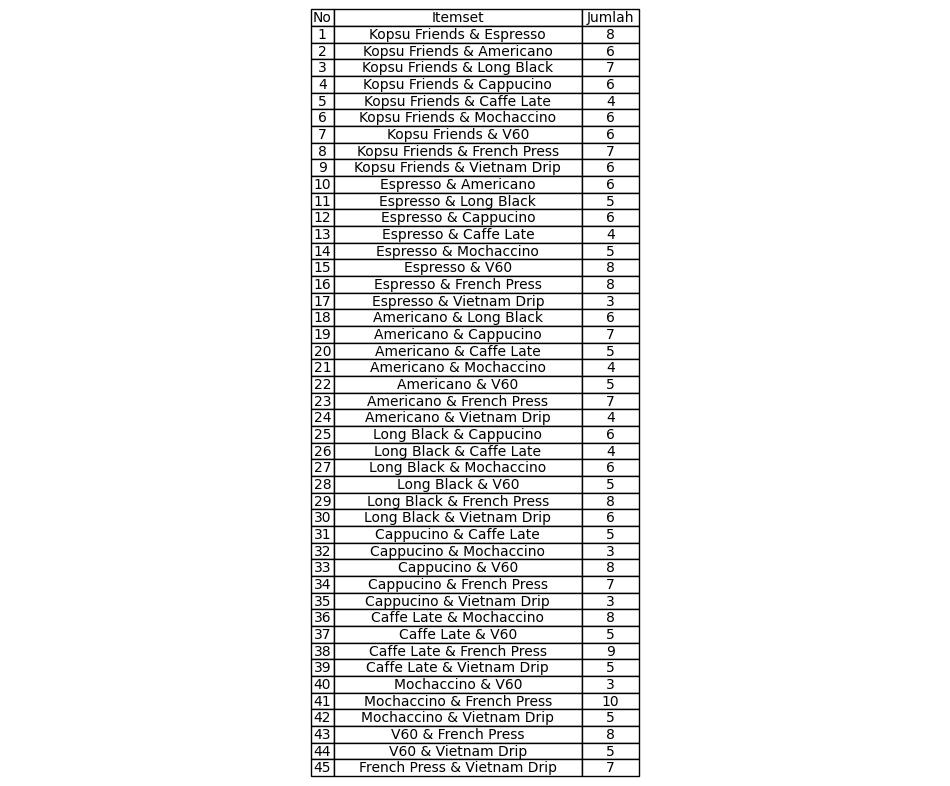


Tabel 2-Itemset:
 No                      Itemset  Jumlah
  1     Kopsu Friends & Espresso       8
  2    Kopsu Friends & Americano       6
  3   Kopsu Friends & Long Black       7
  4    Kopsu Friends & Cappucino       6
  5   Kopsu Friends & Caffe Late       4
  6   Kopsu Friends & Mochaccino       6
  7          Kopsu Friends & V60       6
  8 Kopsu Friends & French Press       7
  9 Kopsu Friends & Vietnam Drip       6
 10         Espresso & Americano       6
 11        Espresso & Long Black       5
 12         Espresso & Cappucino       6
 13        Espresso & Caffe Late       4
 14        Espresso & Mochaccino       5
 15               Espresso & V60       8
 16      Espresso & French Press       8
 17      Espresso & Vietnam Drip       3
 18       Americano & Long Black       6
 19        Americano & Cappucino       7
 20       Americano & Caffe Late       5
 21       Americano & Mochaccino       4
 22              Americano & V60       5
 23     Americano & French Press       

In [ ]:

from itertools import combinations



# Daftar menu yang digunakan
menu_list = [
    "Kopsu Friends", "Espresso", "Americano", "Long Black",
    "Cappucino", "Caffe Late", "Mochaccino", "V60",
    "French Press", "Vietnam Drip"
]

# Baca data dari file CSV
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Project_SPPK_Kopi.csv', sep=';', on_bad_lines='warn')

# Membuat DataFrame kosong untuk hasil biner
df_binary = pd.DataFrame(columns=["ID"] + menu_list)

# Tambahkan kolom ID
df_binary["ID"] = range(1, len(df) + 1)

# Proses setiap transaksi dan pisahkan menu
for index, row in df.iterrows():
    # Ambil daftar menu dari kolom 'Data Transaksi'
    transaksi = row["Data Transaksi"].split(", ")
    # Set nilai 1 untuk setiap menu yang dipesan
    df_binary.loc[index, menu_list] = [1 if menu in transaksi else 0 for menu in menu_list]

# Pisahkan kolom ID dari kolom menu
menu_columns = df_binary.drop(columns=['ID'])  # Hanya kolom menu yang akan diubah

# Total transaksi (jumlah baris data)
total_transaksi = len(df_binary)

# Daftar item yang ada dalam kolom
items = list(menu_columns.columns)

# Buat kombinasi 2-itemset
itemset_2 = list(combinations(items, 2))

# Hitung jumlah kemunculan setiap pasangan 2-itemset
itemset_counts = {}
for item1, item2 in itemset_2:
    # Hitung jumlah kemunculan pasangan item dalam transaksi
    count = sum((menu_columns[item1] & menu_columns[item2]) == 1)
    itemset_counts[(item1, item2)] = count

# Buat DataFrame untuk menyimpan hasil 2-itemset
df_itemset2 = pd.DataFrame({
    'Itemset': [f"{item1} & {item2}" for item1, item2 in itemset_counts.keys()],
    'Jumlah': itemset_counts.values()
})







# Tambahkan kolom No untuk nomor urut
df_itemset2['No'] = range(1, len(df_itemset2) + 1)

# Atur urutan kolom agar No muncul di depan
df_itemset2 = df_itemset2[['No', 'Itemset', 'Jumlah']]

# Tampilkan DataFrame hasil 2-itemset
display(df_itemset2)

# Visualisasi tabel hasil 2-itemset menggunakan matplotlib
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')

# Buat tabel dengan data hasil 2-itemset
table = ax.table(
    cellText=df_itemset2.values,
    colLabels=df_itemset2.columns,
    cellLoc='center',  # Data rata tengah
    loc='center'
)

# Atur font dan lebar kolom
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df_itemset2.columns))))

# Tampilkan tabel
plt.show()

# Menampilkan tabel hasil 2-itemset
print("\nTabel 2-Itemset:")
print(df_itemset2.to_string(index=False))


In [ ]:
# Threshold support minimum
min_support = 4

# Filter itemset_2_counts yang memiliki jumlah lebih dari atau sama dengan min_support
C2 = {itemset: count for itemset, count in itemset_2_counts.items() if count >= min_support}

# Menampilkan hasil itemset yang memenuhi syarat
print("C2 (2-itemset dengan support >= 4):")
for itemset, count in C2.items():
    print(f"{itemset}: {count}")

C2 (2-itemset dengan support >= 4):
Kopsu Friends, Espresso: 8
Kopsu Friends, Americano: 6
Kopsu Friends, Long Black: 7
Kopsu Friends, Cappucino: 6
Kopsu Friends, Caffe Late: 4
Kopsu Friends, Mochaccino: 6
Kopsu Friends, V60: 6
Kopsu Friends, French Press: 7
Kopsu Friends, Vietnam Drip: 6
Espresso, Americano: 6
Espresso, Long Black: 5
Espresso, Cappucino: 6
Espresso, Caffe Late: 4
Espresso, Mochaccino: 5
Espresso, V60: 8
Espresso, French Press: 8
Americano, Long Black: 6
Americano, Cappucino: 7
Americano, Caffe Late: 5
Americano, Mochaccino: 4
Americano, V60: 5
Americano, French Press: 7
Americano, Vietnam Drip: 4
Long Black, Cappucino: 6
Long Black, Caffe Late: 4
Long Black, Mochaccino: 6
Long Black, V60: 5
Long Black, French Press: 8
Long Black, Vietnam Drip: 6
Cappucino, Caffe Late: 5
Cappucino, V60: 8
Cappucino, French Press: 7
Caffe Late, Mochaccino: 8
Caffe Late, V60: 5
Caffe Late, French Press: 9
Caffe Late, Vietnam Drip: 5
Mochaccino, French Press: 10
Mochaccino, Vietnam Drip: 

,No,Itemset,Jumlah
0,1,Kopsu Friends & Espresso,8
1,2,Kopsu Friends & Americano,6
2,3,Kopsu Friends & Long Black,7
3,4,Kopsu Friends & Cappucino,6
4,5,Kopsu Friends & Caffe Late,4
5,6,Kopsu Friends & Mochaccino,6
6,7,Kopsu Friends & V60,6
7,8,Kopsu Friends & French Press,7
8,9,Kopsu Friends & Vietnam Drip,6
9,10,Espresso & Americano,6


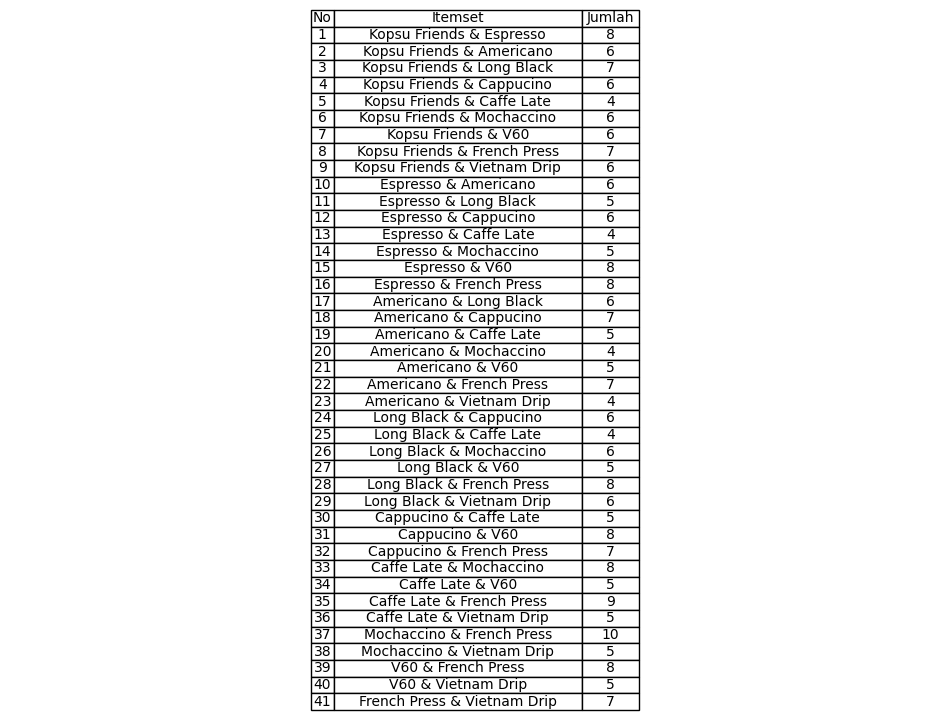


Tabel 2-Itemset dengan Support >= 4:
 No                      Itemset  Jumlah
  1     Kopsu Friends & Espresso       8
  2    Kopsu Friends & Americano       6
  3   Kopsu Friends & Long Black       7
  4    Kopsu Friends & Cappucino       6
  5   Kopsu Friends & Caffe Late       4
  6   Kopsu Friends & Mochaccino       6
  7          Kopsu Friends & V60       6
  8 Kopsu Friends & French Press       7
  9 Kopsu Friends & Vietnam Drip       6
 10         Espresso & Americano       6
 11        Espresso & Long Black       5
 12         Espresso & Cappucino       6
 13        Espresso & Caffe Late       4
 14        Espresso & Mochaccino       5
 15               Espresso & V60       8
 16      Espresso & French Press       8
 17       Americano & Long Black       6
 18        Americano & Cappucino       7
 19       Americano & Caffe Late       5
 20       Americano & Mochaccino       4
 21              Americano & V60       5
 22     Americano & French Press       7
 23     Americano &

In [ ]:
# Daftar menu yang digunakan
menu_list = [
    "Kopsu Friends", "Espresso", "Americano", "Long Black",
    "Cappucino", "Caffe Late", "Mochaccino", "V60",
    "French Press", "Vietnam Drip"
]

# Baca data dari file CSV
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Project_SPPK_Kopi.csv', sep=';', on_bad_lines='warn')

# Membuat DataFrame kosong untuk hasil biner
df_binary = pd.DataFrame(columns=["ID"] + menu_list)

# Tambahkan kolom ID
df_binary["ID"] = range(1, len(df) + 1)

# Proses setiap transaksi dan pisahkan menu
for index, row in df.iterrows():
    # Ambil daftar menu dari kolom 'Data Transaksi'
    transaksi = row["Data Transaksi"].split(", ")
    # Set nilai 1 untuk setiap menu yang dipesan
    df_binary.loc[index, menu_list] = [1 if menu in transaksi else 0 for menu in menu_list]

# Pisahkan kolom ID dari kolom menu
menu_columns = df_binary.drop(columns=['ID'])  # Hanya kolom menu yang akan diubah

# Total transaksi (jumlah baris data)
total_transaksi = len(df_binary)

# Daftar item yang ada dalam kolom
items = list(menu_columns.columns)

# Buat kombinasi 2-itemset
itemset_2 = list(combinations(items, 2))

# Hitung jumlah kemunculan setiap pasangan 2-itemset
itemset_2_counts = {}
for item1, item2 in itemset_2:
    # Hitung jumlah kemunculan pasangan item dalam transaksi
    count = sum((menu_columns[item1] & menu_columns[item2]) == 1)
    itemset_2_counts[(item1, item2)] = count

# Threshold support minimum
min_support = 4

# Filter itemset_2_counts yang memiliki jumlah lebih dari atau sama dengan min_support
C2 = {itemset: count for itemset, count in itemset_2_counts.items() if count >= min_support}

# Menampilkan hasil itemset yang memenuhi syarat dalam format tabel
df_itemset2_filtered = pd.DataFrame({
    'Itemset': [f"{item1} & {item2}" for item1, item2 in C2.keys()],
    'Jumlah': C2.values()
})

# Tambahkan kolom No untuk nomor urut
df_itemset2_filtered['No'] = range(1, len(df_itemset2_filtered) + 1)

# Atur urutan kolom agar No muncul di depan
df_itemset2_filtered = df_itemset2_filtered[['No', 'Itemset', 'Jumlah']]

# Tampilkan DataFrame hasil 2-itemset yang memenuhi syarat
display(df_itemset2_filtered)

# Visualisasi tabel hasil 2-itemset yang memenuhi syarat menggunakan matplotlib
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')

# Buat tabel dengan data hasil 2-itemset
table = ax.table(
    cellText=df_itemset2_filtered.values,
    colLabels=df_itemset2_filtered.columns,
    cellLoc='center',  # Data rata tengah
    loc='center'
)

# Atur font dan lebar kolom
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df_itemset2_filtered.columns))))

# Tampilkan tabel
plt.show()

# Menampilkan tabel hasil 2-itemset yang memenuhi syarat
print("\nTabel 2-Itemset dengan Support >= 4:")
print(df_itemset2_filtered.to_string(index=False))


Mencari 3 Item set

In [ ]:
# Total transaksi
total_transactions = len(df_binary)

# Membuat kombinasi itemset 3-item dari itemset 2-item
itemset_3 = []
for item1, item2 in combinations(itemset_2, 2):
    # Gabungkan dua itemset yang memiliki setidaknya satu item yang sama
    common_items = set(item1).intersection(set(item2))
    if len(common_items) == 1:  # Kombinasi valid jika ada satu item yang sama
        itemset_3.append(tuple(sorted(set(item1) | set(item2))))

# Hitung support untuk setiap 3-itemset
itemset_3_counts = {}
for itemset in itemset_3:
    count = sum(
        (df_binary[list(itemset)[0]] == 1) &
        (df_binary[list(itemset)[1]] == 1) &
        (df_binary[list(itemset)[2]] == 1)
    )
    itemset_3_counts[f"{', '.join(itemset)}"] = count

# Membuat DataFrame untuk hasil
data_tabel_itemset3 = {
    "Nama Itemset": list(itemset_3_counts.keys()),
    "Jumlah": list(itemset_3_counts.values()),
}

df_itemset3 = pd.DataFrame(data_tabel_itemset3)

# Menampilkan hasil
print("Tabel Itemset 3:")
print(df_itemset3.to_string(index=False))

Tabel Itemset 3:
                             Nama Itemset  Jumlah
       Americano, Espresso, Kopsu Friends       5
      Espresso, Kopsu Friends, Long Black       4
       Cappucino, Espresso, Kopsu Friends       4
      Caffe Late, Espresso, Kopsu Friends       2
      Espresso, Kopsu Friends, Mochaccino       3
             Espresso, Kopsu Friends, V60       5
    Espresso, French Press, Kopsu Friends       5
    Espresso, Kopsu Friends, Vietnam Drip       3
     Americano, Kopsu Friends, Long Black       3
      Americano, Cappucino, Kopsu Friends       4
     Americano, Caffe Late, Kopsu Friends       2
     Americano, Kopsu Friends, Mochaccino       2
            Americano, Kopsu Friends, V60       3
   Americano, French Press, Kopsu Friends       3
   Americano, Kopsu Friends, Vietnam Drip       2
     Cappucino, Kopsu Friends, Long Black       4
    Caffe Late, Kopsu Friends, Long Black       1
    Kopsu Friends, Long Black, Mochaccino       3
           Kopsu Friends, Long Bl

memastikan hasil dari c3

In [ ]:
# Fungsi untuk menghitung ulang support untuk 3-itemset
def verify_support(itemset_3_counts, df_binary):
    verification_results = {}
    for itemset_str, count in itemset_3_counts.items():
        # Pecah itemset menjadi list item
        items = itemset_str.split(', ')
        # Hitung ulang support langsung dari df_binary
        recalculated_count = sum(
            (df_binary[items[0]] == 1) &
            (df_binary[items[1]] == 1) &
            (df_binary[items[2]] == 1)
        )
        # Bandingkan dengan nilai yang dihitung sebelumnya
        verification_results[itemset_str] = {
            "Original": count,
            "Recalculated": recalculated_count,
            "Match": count == recalculated_count
        }
    return verification_results

# Verifikasi hasil
verification_results = verify_support(itemset_3_counts, df_binary)

# Tampilkan hasil verifikasi
for itemset, result in verification_results.items():
    print(f"Itemset: {itemset}")
    print(f"  Original: {result['Original']}, Recalculated: {result['Recalculated']}, Match: {result['Match']}")


Itemset: Americano, Espresso, Kopsu Friends
  Original: 5, Recalculated: 5, Match: True
Itemset: Espresso, Kopsu Friends, Long Black
  Original: 4, Recalculated: 4, Match: True
Itemset: Cappucino, Espresso, Kopsu Friends
  Original: 4, Recalculated: 4, Match: True
Itemset: Caffe Late, Espresso, Kopsu Friends
  Original: 2, Recalculated: 2, Match: True
Itemset: Espresso, Kopsu Friends, Mochaccino
  Original: 3, Recalculated: 3, Match: True
Itemset: Espresso, Kopsu Friends, V60
  Original: 5, Recalculated: 5, Match: True
Itemset: Espresso, French Press, Kopsu Friends
  Original: 5, Recalculated: 5, Match: True
Itemset: Espresso, Kopsu Friends, Vietnam Drip
  Original: 3, Recalculated: 3, Match: True
Itemset: Americano, Kopsu Friends, Long Black
  Original: 3, Recalculated: 3, Match: True
Itemset: Americano, Cappucino, Kopsu Friends
  Original: 4, Recalculated: 4, Match: True
Itemset: Americano, Caffe Late, Kopsu Friends
  Original: 2, Recalculated: 2, Match: True
Itemset: Americano, Kops

menentukan 3 itemset yang kemunculan nya paling sering

In [ ]:
# Tentukan itemset dengan support tertinggi
most_frequent_itemset = max(itemset_3_counts.items(), key=lambda x: x[1])

# Tampilkan hasil
print(f"Itemset dengan kemunculan paling sering:")
print(f"  Nama Itemset: {most_frequent_itemset[0]}")
print(f"  Jumlah Kemunculan: {most_frequent_itemset[1]}")

Itemset dengan kemunculan paling sering:
  Nama Itemset: Caffe Late, French Press, Mochaccino
  Jumlah Kemunculan: 8


Mencari Aturan aosiasi dari C3

Punya devic

In [ ]:
from itertools import combinations
import pandas as pd

# Misalkan itemset_2_counts dan itemset_3_counts sudah ada
# itemset_2_counts adalah hasil dari C2, dan itemset_3_counts dari kombinasi C3

association_rules = []

# Iterasi untuk semua itemset 3 yang ada
for itemset_3, support_3 in itemset_3_counts.items():
    antecedent = itemset_3[:2]  # Dua item pertama sebagai antecedent (2-itemset)
    consequent = itemset_3[2:]  # Item ketiga sebagai consequent

# Ambil support untuk antecedent (2-itemset)
    antecedent_support = itemset_2_counts.get(antecedent, 0)

# Jika support untuk antecedent lebih besar dari 0, hitung confidence
    if antecedent_support > 0:
         confidence = support_3 / antecedent_support

# Hanya simpan aturan jika confidence lebih besar dari threshold tertentu (misalnya 60%)
         if confidence >= 0.6:
# Tambahkan aturan asosiasi ke dalam daftar
             association_rules.append({
                  'Rule': f"Jika Beli {', '.join(antecedent)} maka akan beli {', '.join(consequent)}",
                  'Support': support_3,
                  'Confidence': support_3,
                  'Confidence (%)': f"{confidence * 100:.2f}%"
             })
     else:
          print(f"Antecedent {antecedent} tidak ditemukan di itemset_2_counts atau supportnya 0")

if not association_rules:
      print("Tidak ada aturan asosiasi yang memenuhi kriteria.")
 else:







# Buat DataFrame untuk menampilkan hasil aturan asosiasi
      df_rules = pd.DataFrame(association_rules)

# Tampilkan tabel aturan asosiasi
      print("Aturan Asosiasi dari C3:")
      print(df_rules.to_string(index=False))


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 30)

In [ ]:
from itertools import combinations

# Data itemset 3 yang paling sering
most_frequent_itemset = max(itemset_3_counts, key=itemset_3_counts.get)
support_most_frequent = itemset_3_counts[most_frequent_itemset]

# Pisahkan itemset menjadi elemen individu
items = list(most_frequent_itemset)

# Data support untuk 2-itemset otomatis dari itemset_2_counts
itemset_2_support = {
    ", ".join(sorted([item1, item2])): itemset_2_counts[(item1, item2)]
    for item1, item2 in combinations(items, 2)
}

# Dictionary untuk aturan asosiasi dan confidence
association_rules = []

# Buat aturan asosiasi dari itemset 3
for antecedent in combinations(items, 2):
    consequent = set(items) - set(antecedent)
    consequent = list(consequent)[0]

    antecedent_str = ", ".join(sorted(antecedent))
    rule_support = support_most_frequent
    antecedent_support = itemset_2_support[antecedent_str]

# Hitung confidence
    confidence = rule_support / antecedent_support

   # Tambahkan aturan ke daftar
    association_rules.append({
        "Rule": f"Jika Beli {antecedent_str} maka akan beli {consequent}",
        "Confidence": f"{support_most_frequent}/{itemset_2_support[lhs_str]}",


        "Confidence (%)": f"{confidence:.2%}"
})

# Buat DataFrame untuk tabel aturan asosiasi
df_rules = pd.DataFrame(association_rules)

# Tampilkan tabel aturan asosiasi
print("Aturan Asosiasi dari C3:")
print(df_rules.to_string(index=False))

Aturan Asosiasi dari C3:
                                                        Rule Confidence Confidence (%)
Jika Beli Caffe Late, French Press maka akan beli Mochaccino        1/2         50.00%
Jika Beli Caffe Late, Mochaccino maka akan beli French Press        1/2         50.00%
Jika Beli French Press, Mochaccino maka akan beli Caffe Late        1/2         50.00%


TESTING

In [ ]:
from itertools import combinations
import pandas as pd

# Data itemset 3 yang paling sering
most_frequent_itemset = max(itemset_3_counts, key=itemset_3_counts.get)
support_most_frequent = itemset_3_counts[most_frequent_itemset]

# Pisahkan itemset menjadi elemen individu, pastikan item adalah string
items = most_frequent_itemset.split(', ') # Split the string by ', ' to get individual items

# Data support untuk 2-itemset otomatis dari itemset_2_counts
itemset_2_support = {
    ", ".join(sorted([item1, item2])): itemset_2_counts.get((item1, item2), 0)  # Use get with default value 0
    for item1, item2 in combinations(items, 2)
}

# Dictionary untuk aturan asosiasi dan confidence
association_rules = []

# Buat aturan asosiasi dari itemset 3
for antecedent in combinations(items, 2):
    consequent = set(items) - set(antecedent)
    consequent = list(consequent)[0]

    antecedent_str = ", ".join(sorted(antecedent))
    antecedent_support = itemset_2_support[antecedent_str]

    # Confidence dihitung berdasarkan support antecedent dan support rule
    # Handle ZeroDivisionError if antecedent_support is 0
    confidence = support_most_frequent / antecedent_support if antecedent_support else 0

    # Simpan aturan asosiasi dan confidence
    association_rules.append({
        "Rule": f"Jika Beli {antecedent_str} maka akan beli {consequent}",
        "Confidence": f"{support_most_frequent}/{antecedent_support}",
        "Confidence (%)": f"{confidence:.2%}"
    })

# Buat DataFrame untuk tabel aturan asosiasi
df_rules = pd.DataFrame(association_rules)

# Tampilkan tabel aturan asosiasi
print("Aturan Asosiasi dari C3:")
print(df_rules.to_string(index=False))

NameError: name 'itemset_3_counts' is not defined

Punya bayu

In [ ]:
# Data untuk itemset 3 paling sering
most_frequent_itemset = "Caffe Late, French Press, Mochaccino"
support_most_frequent = 8

# Pisahkan itemset menjadi elemen individu
items = most_frequent_itemset.split(", ")

# Data support untuk 2-itemset
itemset_2_support = {
    "Caffe Late, French Press": 9,
    "Caffe Late, Mochaccino": 8,
    "French Press, Mochaccino": 10,
}

# Dictionary untuk aturan asosiasi dan confidence
association_rules = []

# Bentuk aturan asosiasi dan hitung confidence
for i in range(3):
    lhs = [items[j] for j in range(3) if j != i]  # Kombinasi 2-itemset
    rhs = items[i]  # Item yang menjadi "kesimpulan"
    lhs_str = ", ".join(lhs)

    # Hitung confidence
    confidence = support_most_frequent / itemset_2_support[lhs_str]

    # Simpan aturan dan confidence dalam format tabel
    association_rules.append({
        "Rule": f"Jika Beli {lhs_str} maka akan beli {rhs}",
        "Confidence": f"{support_most_frequent}/{itemset_2_support[lhs_str]}",
        "Confidence (%)": f"{confidence:.2%}"
    })

# Buat DataFrame untuk tabel aturan asosiasi
df_rules = pd.DataFrame(association_rules)

# Tampilkan tabel aturan asosiasi
print("Aturan Asosiasi dari C3:")
print(df_rules.to_string(index=False))


Aturan Asosiasi dari C3:
                                                        Rule Confidence Confidence (%)
Jika Beli French Press, Mochaccino maka akan beli Caffe Late       8/10         80.00%
Jika Beli Caffe Late, Mochaccino maka akan beli French Press        8/8        100.00%
Jika Beli Caffe Late, French Press maka akan beli Mochaccino        8/9         88.89%


Pengujian kombinasi itemset nya

In [ ]:
# Data untuk itemset 3 paling sering
most_frequent_itemset = "Caffe Late, French Press, Mochaccino"
support_most_frequent = 8

# Pisahkan itemset menjadi elemen individu
items = most_frequent_itemset.split(", ")

# Data support untuk 2-itemset
itemset_2_support = {
    "Caffe Late, French Press": 9,
    "Caffe Late, Mochaccino": 8,
    "French Press, Mochaccino": 10,
}

# Dictionary untuk aturan asosiasi dan confidence
association_rules = []

# Hitung confidence dan lift
for i in range(3):
    lhs = [items[j] for j in range(3) if j != i]  # Kombinasi 2-itemset
    rhs = items[i]  # Item yang menjadi "kesimpulan"
    lhs_str = ", ".join(lhs)

    # Hitung confidence
    confidence = support_most_frequent / itemset_2_support[lhs_str]
    support = support_most_frequent / total_transactions
    lift = confidence / (itemset_2_support[lhs_str] / total_transactions)

    # Simpan aturan dan nilai-nilai terkait dalam format tabel
    association_rules.append({
        "Item": lhs_str,
        "Conclusion": rhs,
        "Support": f"{support:.3f}",
        "Confidence": f"{confidence:.3f}",
        "Lift": f"{lift:.3f}",
    })

# Buat DataFrame untuk tabel aturan asosiasi
df_rules = pd.DataFrame(association_rules)

# Tampilkan tabel aturan asosiasi
print("Pengujian dengan rules dari pola kombinasi itemset:")
print(df_rules.to_string(index=False))

Pengujian dengan rules dari pola kombinasi itemset:
                    Item   Conclusion Support Confidence  Lift
French Press, Mochaccino   Caffe Late   0.400      0.800 1.600
  Caffe Late, Mochaccino French Press   0.400      1.000 2.500
Caffe Late, French Press   Mochaccino   0.400      0.889 1.975


In [ ]:
import pandas as pd
from itertools import combinations

# Data biner df_binary: pastikan memiliki kolom untuk item dan nilai 1 jika item ada dalam transaksi, 0 jika tidak.
# Misalnya, df_binary memiliki data transaksi sebagai berikut:
#     Americano  Caffe Late  Cappucino  Espresso  Long Black  ...
# 0          1           0          1         1           0  ...
# 1          0           1          0         0           1  ...
# (setiap baris mewakili transaksi)

# Pastikan df_binary sudah diinisialisasi
# Misalnya df_binary = pd.DataFrame(...)

# Mengambil daftar item dari kolom (tanpa ID jika ada)
items = [col for col in df_binary.columns if col != 'ID']

# Membuat kombinasi 2-itemset dari nama kolom
item_combinations = list(combinations(items, 2))

# Menyimpan hasil kombinasi dan jumlah transaksi yang memenuhi kondisi 2-itemset
two_itemset_counts = []

# Menghitung jumlah transaksi untuk setiap kombinasi 2-itemset
for item1, item2 in item_combinations:
    # Hitung jumlah transaksi di mana kedua item ada (nilai 1 pada kedua item)
    count = df_binary[(df_binary[item1] == 1) & (df_binary[item2] == 1)].shape[0]

# Menambahkan ke list hanya jika ada transaksi yang memenuhi kondisi
    if count > 0:
         two_itemset_counts.append((f"({item1}, {item2})", count))

# Membuat DataFrame untuk 2-itemset
two_itemset_df = pd.DataFrame(two_itemset_counts, columns=["Itemset", "Jumlah"])

# Mengurutkan berdasarkan nama itemset secara alfabetis
two_itemset_df = two_itemset_df.sort_values(by="Itemset").reset_index(drop=True)

# Menampilkan hasil
print("Tabel 2-itemset sebelum batasan support:")
print(two_itemset_df.to_string(index=False))


Tabel 2-itemset sebelum batasan support:
                      Itemset  Jumlah
      (Americano, Caffe Late)       5
       (Americano, Cappucino)       7
    (Americano, French Press)       7
      (Americano, Long Black)       6
      (Americano, Mochaccino)       4
             (Americano, V60)       5
    (Americano, Vietnam Drip)       4
   (Caffe Late, French Press)       9
     (Caffe Late, Mochaccino)       8
            (Caffe Late, V60)       5
   (Caffe Late, Vietnam Drip)       5
      (Cappucino, Caffe Late)       5
    (Cappucino, French Press)       7
      (Cappucino, Mochaccino)       3
             (Cappucino, V60)       8
    (Cappucino, Vietnam Drip)       3
        (Espresso, Americano)       6
       (Espresso, Caffe Late)       4
        (Espresso, Cappucino)       6
     (Espresso, French Press)       8
       (Espresso, Long Black)       5
       (Espresso, Mochaccino)       5
              (Espresso, V60)       8
     (Espresso, Vietnam Drip)       3
 (French 

In [18]:
import pandas as pd
from tkinter import Tk, Frame, Button, Label, StringVar, ttk, Listbox, Scrollbar

# File path CSV
file_path = "C:/Pyton/Project_SPPK_Kopi.csv"

# Fungsi untuk membaca file CSV
def load_data():
    global df
    try:
        df = pd.read_csv(file_path, sep=';', on_bad_lines='warn')
        print(f"Data loaded: {df.head()}")
        display_data(df)
    except Exception as e:
        print(f"Error loading data: {e}")
        log_label.config(text=f"Error loading data: {e}")

# Fungsi untuk menampilkan data di Treeview
def display_data(data):
    # Menghapus data sebelumnya
    for row in treeview.get_children():
        treeview.delete(row)
    
    # Menampilkan data di Treeview dengan nomor urut
    for idx, row in data.iterrows():
        treeview.insert("", "end", values=(idx + 1, row['Data Transaksi']))  # Menambahkan nomor urut

# Fungsi untuk menambahkan data baru
def add_data():
    selected_menus = menu_listbox.curselection()  # Mengambil item yang dipilih
    if selected_menus:
        # Membuat transaksi baru dengan memilih menu yang dipilih
        selected_menu_names = [menu_listbox.get(i) for i in selected_menus]
        menu_string = ", ".join(selected_menu_names)  # Menggabungkan menu yang dipilih dengan koma
        new_row = {"Data Transaksi": menu_string}
        global df
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
        display_data(df)
        log_label.config(text="Data added successfully!")
        save_data()
    else:
        log_label.config(text="Please select at least one menu!")

# Fungsi untuk menyimpan data kembali ke CSV
def save_data():
    try:
        df.to_csv(file_path, sep=';', index=False)
        log_label.config(text="Data saved successfully!")
    except Exception as e:
        log_label.config(text=f"Error saving data: {e}")

# GUI setup
root = Tk()
root.title("Data Transaksi Bardan Coffee and Friend")  # Menambahkan judul pada window
root.geometry("1200x700")  # Ukuran window lebih besar
root.config(bg="#F7F7F7")  # Latar belakang abu-abu terang

# Menambahkan judul besar di bagian atas
title_label = Label(root, text="Data Transaksi Bardan Coffee and Friend", font=("Helvetica", 20, "bold"), bg="#F7F7F7")
title_label.pack(pady=20)

frame = Frame(root, bg="#F7F7F7")
frame.pack(pady=20)

menu_var = StringVar()
menu_options = [
    "Kopsu Friends", "Espresso", "Americano", "Long Black",
    "Cappucino", "Caffe Late", "Mochaccino", "V60",
    "French Press", "Vietnam Drip"
]

# Label dengan font yang lebih besar dan warna
Label(frame, text="Select Menu:", font=("Helvetica", 14), bg="#F7F7F7").grid(row=0, column=0, padx=10)

# Listbox untuk memilih beberapa menu sekaligus, ditambah dengan Scrollbar
menu_listbox = Listbox(frame, selectmode="multiple", height=6, width=50, font=("Helvetica", 12))
for menu in menu_options:
    menu_listbox.insert("end", menu)
menu_listbox.grid(row=0, column=1, padx=10)

# Scrollbar untuk Listbox
scrollbar = Scrollbar(frame, orient="vertical", command=menu_listbox.yview)
menu_listbox.config(yscrollcommand=scrollbar.set)
scrollbar.grid(row=0, column=2, sticky="ns", padx=5)

add_button = Button(frame, text="Add Data", command=add_data, bg="#4CAF50", fg="white", font=("Helvetica", 12), relief="raised", width=20)
add_button.grid(row=0, column=3, padx=10)

save_button = Button(frame, text="Save Data", command=save_data, bg="#2196F3", fg="white", font=("Helvetica", 12), relief="raised", width=20)
save_button.grid(row=0, column=4, padx=10)

# Treeview untuk menampilkan data dalam bentuk tabel dengan nomor urut
treeview = ttk.Treeview(root, columns=("No", "Data Transaksi"), show="headings", height=15)
treeview.heading("No", text="No")
treeview.heading("Data Transaksi", text="Data Transaksi")
treeview.column("No", width=100)
treeview.column("Data Transaksi", width=800)
treeview.pack(pady=10, padx=10)

log_label = Label(root, text="", fg="red", font=("Helvetica", 12))
log_label.pack()

load_button = Button(root, text="Load Data", command=load_data, bg="#FF9800", fg="white", font=("Helvetica", 12), relief="raised", width=20)
load_button.pack(pady=5)

# Initialize df as empty DataFrame
df = pd.DataFrame()

root.mainloop()


Data loaded:                                       Data Transaksi
0  Kopsu Friends, Espresso, Americano, Long Black...
1   Kopsu Friends, Espresso, Americano, Vietnam Drip
2  Americano, Long Black, Cappucino, Caffe Late, ...
3  Kopsu Friends, Long Black, Cappucino, V60, Vie...
4  Espresso, Cappucino, Caffe Late, Mochaccino, V...


In [47]:
import pandas as pd
from tkinter import Tk, Frame, Button, Label, StringVar, ttk, Listbox, Scrollbar
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

# File path CSV
file_path = "C:/Pyton/Project_SPPK_Kopi.csv"

# Fungsi untuk membaca file CSV
def load_data():
    global df
    try:
        df = pd.read_csv(file_path, sep=';', on_bad_lines='warn')
        print(f"Data loaded: {df.head()}")
        display_data(df)
    except Exception as e:
        print(f"Error loading data: {e}")
        log_label.config(text=f"Error loading data: {e}")

# Fungsi untuk menampilkan data di Treeview
def display_data(data):
    # Menghapus data sebelumnya
    for row in treeview.get_children():
        treeview.delete(row)
    
    # Menampilkan data di Treeview dengan nomor urut
    for idx, row in data.iterrows():
        treeview.insert("", "end", values=(idx + 1, row['Data Transaksi']))  # Menambahkan nomor urut

# Fungsi untuk menambahkan data baru
def add_data():
    selected_menus = menu_listbox.curselection()  # Mengambil item yang dipilih
    if selected_menus:
        # Membuat transaksi baru dengan memilih menu yang dipilih
        selected_menu_names = [menu_listbox.get(i) for i in selected_menus]
        menu_string = ", ".join(selected_menu_names)  # Menggabungkan menu yang dipilih dengan koma
        new_row = {"Data Transaksi": menu_string}
        global df
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
        display_data(df)
        log_label.config(text="Data added successfully!")
        save_data()
    else:
        log_label.config(text="Please select at least one menu!")

# Fungsi untuk menyimpan data kembali ke CSV
def save_data():
    try:
        df.to_csv(file_path, sep=';', index=False)
        log_label.config(text="Data saved successfully!")
    except Exception as e:
        log_label.config(text=f"Error saving data: {e}")

# Fungsi untuk menganalisis pola asosiasi dengan Apriori
def apriori_analysis():
    # Mengonversi data menjadi format yang dapat digunakan oleh Apriori
    transactions = df['Data Transaksi'].apply(lambda x: x.split(", ")).tolist()
    
    # Menggunakan TransactionEncoder untuk mengubah data menjadi format yang bisa diproses oleh Apriori
    encoder = TransactionEncoder()
    encoded_data = encoder.fit(transactions).transform(transactions)
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.columns_)
    
    # Menerapkan algoritma Apriori untuk menemukan frequent itemsets
    frequent_itemsets = apriori(encoded_df, min_support=0.3, use_colnames=True)
    print(frequent_itemsets)
    
    if frequent_itemsets.empty:
        log_label.config(text="Tidak ada itemsets yang ditemukan!")
        return

    # Mengambil hanya item yang muncul dalam itemsets
    item_counts = frequent_itemsets['itemsets'].apply(lambda x: list(x)[0]).value_counts()
    
    # Menampilkan 3 item teratas yang paling sering muncul
    top_items = item_counts.head(3)
    log_label.config(text=f"3 Menu paling sering dipesan:\n{top_items.to_string()}")

# GUI setup
root = Tk()
root.title("Data Transaksi Bardan Coffee and Friend")  # Menambahkan judul pada window
root.geometry("1200x700")  # Ukuran window lebih besar
root.config(bg="#F7F7F7")  # Latar belakang abu-abu terang

# Menambahkan judul besar di bagian atas
title_label = Label(root, text="Data Transaksi Bardan Coffee and Friend", font=("Helvetica", 20, "bold"), bg="#F7F7F7")
title_label.pack(pady=20)

frame = Frame(root, bg="#F7F7F7")
frame.pack(pady=20)

menu_var = StringVar()
menu_options = [
    "Kopsu Friends", "Espresso", "Americano", "Long Black",
    "Cappucino", "Caffe Late", "Mochaccino", "V60",
    "French Press", "Vietnam Drip"
]

# Label dengan font yang lebih besar dan warna
Label(frame, text="Select Menu:", font=("Helvetica", 14), bg="#F7F7F7").grid(row=0, column=0, padx=10)

# Listbox untuk memilih beberapa menu sekaligus, ditambah dengan Scrollbar
menu_listbox = Listbox(frame, selectmode="multiple", height=6, width=50, font=("Helvetica", 12))
for menu in menu_options:
    menu_listbox.insert("end", menu)
menu_listbox.grid(row=0, column=1, padx=10)

# Scrollbar untuk Listbox
scrollbar = Scrollbar(frame, orient="vertical", command=menu_listbox.yview)
menu_listbox.config(yscrollcommand=scrollbar.set)
scrollbar.grid(row=0, column=2, sticky="ns", padx=5)

add_button = Button(frame, text="Add Data", command=add_data, bg="#4CAF50", fg="white", font=("Helvetica", 12), relief="raised", width=20)
add_button.grid(row=0, column=3, padx=10)

# Ganti tombol "Save Data" menjadi tombol untuk mencari menu yang paling sering muncul
apriori_button = Button(frame, text="Find Most Frequent Menu", command=apriori_analysis, bg="#FF5722", fg="white", font=("Helvetica", 12), relief="raised", width=20)
apriori_button.grid(row=0, column=4, padx=10)

# Treeview untuk menampilkan data dalam bentuk tabel dengan nomor urut
treeview = ttk.Treeview(root, columns=("No", "Data Transaksi"), show="headings", height=15)
treeview.heading("No", text="No")
treeview.heading("Data Transaksi", text="Data Transaksi")
treeview.column("No", width=100)
treeview.column("Data Transaksi", width=800)
treeview.pack(pady=10, padx=10)

log_label = Label(root, text="", fg="red", font=("Helvetica", 12))
log_label.pack()

load_button = Button(root, text="Load Data", command=load_data, bg="#FF9800", fg="white", font=("Helvetica", 12), relief="raised", width=20)
load_button.pack(pady=5)

# Initialize df as empty DataFrame
df = pd.DataFrame()

root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\tkinter\__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "C:\Users\USER\AppData\Local\Temp\ipykernel_20436\1806186670.py", line 57, in apriori_analysis
    transactions = df['Data Transaksi'].apply(lambda x: x.split(", ")).tolist()
                   ~~^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\frame.py", line 4102, in __getitem__
    indexer = self.columns.get_loc(key)
  File "c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\indexes\range.py", line 417, in get_loc
    raise KeyError(key)
KeyError: 'Data Transaksi'


Data loaded:                                       Data Transaksi
0  Kopsu Friends, Espresso, Americano, Long Black...
1   Kopsu Friends, Espresso, Americano, Vietnam Drip
2  Americano, Long Black, Cappucino, Caffe Late, ...
3  Kopsu Friends, Long Black, Cappucino, V60, Vie...
4  Espresso, Cappucino, Caffe Late, Mochaccino, V...
     support                                itemsets
0   0.454545                             (Americano)
1   0.500000                            (Caffe Late)
2   0.500000                             (Cappucino)
3   0.590909                              (Espresso)
4   0.681818                          (French Press)
5   0.590909                         (Kopsu Friends)
6   0.545455                            (Long Black)
7   0.500000                            (Mochaccino)
8   0.500000                                   (V60)
9   0.500000                          (Vietnam Drip)
10  0.318182                  (Cappucino, Americano)
11  0.318182               (Frenc

In [54]:
import pandas as pd
from tkinter import Tk, Frame, Button, Label, StringVar, ttk, Listbox, Scrollbar
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

# Fungsi untuk membaca file CSV
def load_data():
    global df
    try:
        df = pd.read_csv(file_path, sep=';', on_bad_lines='warn')
        print(f"Data loaded: {df.head()}")
        display_data(df)
    except Exception as e:
        print(f"Error loading data: {e}")
        log_label.config(text=f"Error loading data: {e}")

# Fungsi untuk menampilkan data di Treeview
def display_data(data):
    # Menghapus data sebelumnya
    for row in treeview.get_children():
        treeview.delete(row)
    
    # Menampilkan data di Treeview dengan nomor urut
    for idx, row in data.iterrows():
        treeview.insert("", "end", values=(idx + 1, row['Data Transaksi']))  # Menambahkan nomor urut

# Fungsi untuk menambahkan data baru
def add_data():
    selected_menus = menu_listbox.curselection()  # Mengambil item yang dipilih
    if selected_menus:
        # Membuat transaksi baru dengan memilih menu yang dipilih
        selected_menu_names = [menu_listbox.get(i) for i in selected_menus]
        menu_string = ", ".join(selected_menu_names)  # Menggabungkan menu yang dipilih dengan koma
        new_row = {"Data Transaksi": menu_string}
        global df
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
        display_data(df)
        log_label.config(text="Data added successfully!")
        save_data()
    else:
        log_label.config(text="Please select at least one menu!")

# Fungsi untuk menyimpan data kembali ke CSV
def save_data():
    try:
        df.to_csv(file_path, sep=';', index=False)
        log_label.config(text="Data saved successfully!")
    except Exception as e:
        log_label.config(text=f"Error saving data: {e}")

# Fungsi untuk menganalisis pola asosiasi dengan Apriori
def apriori_analysis():
    # Mengonversi data menjadi format yang dapat digunakan oleh Apriori
    transactions = df['Data Transaksi'].apply(lambda x: x.split(", ")).tolist()
    
    # Menggunakan TransactionEncoder untuk mengubah data menjadi format yang bisa diproses oleh Apriori
    encoder = TransactionEncoder()
    encoded_data = encoder.fit(transactions).transform(transactions)
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.columns_)
    
    # Menerapkan algoritma Apriori untuk menemukan frequent itemsets
    frequent_itemsets = apriori(encoded_df, min_support=0.3, use_colnames=True)
    print(frequent_itemsets)
    
    if frequent_itemsets.empty:
        log_label.config(text="Tidak ada itemsets yang ditemukan!")
        return

    # Menghitung confidence dan lift secara manual
    rules = []
    for _, row in frequent_itemsets.iterrows():
        itemset = row['itemsets']
        if len(itemset) > 1:  # Pastikan itemset memiliki lebih dari satu item
            # Memisahkan itemset menjadi dua bagian
            antecedent = list(itemset)[:1]  # Antecedent berisi item pertama
            consequent = list(itemset)[1:]  # Consequent berisi item sisanya
            
            # Mendapatkan support untuk antecedent, consequent, dan union
            antecedent_support = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: set(antecedent).issubset(x))]['support'].values[0]
            consequent_support = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: set(consequent).issubset(x))]['support'].values[0]
            union_support = row['support']
            
            # Menghitung confidence dan lift
            confidence = union_support / antecedent_support
            lift = confidence / consequent_support
            
            # Menyimpan aturan dalam list
            rules.append((antecedent, consequent, union_support, confidence, lift))
    
    # Membuat dataframe untuk hasil aturan
    rules_df = pd.DataFrame(rules, columns=['Antecedent', 'Consequent', 'Support', 'Confidence', 'Lift'])
    
    # Menampilkan 3 aturan dengan confidence tertinggi
    top_3_rules = rules_df.nlargest(3, 'Confidence')
    result_str = "\n".join([f"{', '.join(row['Antecedent'])} -> {', '.join(row['Consequent'])} | Support: {row['Support']:.3f} | Confidence: {row['Confidence']:.3f} | Lift: {row['Lift']:.3f}" for _, row in top_3_rules.iterrows()])
    
    log_label.config(text=result_str)
    
# GUI setup
root = Tk()
root.title("Data Transaksi Bardan Coffee and Friend")  # Menambahkan judul pada window
root.geometry("1200x700")  # Ukuran window lebih besar
root.config(bg="#F7F7F7")  # Latar belakang abu-abu terang

# Menambahkan judul besar di bagian atas
title_label = Label(root, text="Data Transaksi Bardan Coffee and Friend", font=("Helvetica", 20, "bold"), bg="#F7F7F7")
title_label.pack(pady=20)

frame = Frame(root, bg="#F7F7F7")
frame.pack(pady=20)

menu_var = StringVar()
menu_options = [
    "Kopsu Friends", "Espresso", "Americano", "Long Black",
    "Cappucino", "Caffe Late", "Mochaccino", "V60",
    "French Press", "Vietnam Drip"
]

# Label dengan font yang lebih besar dan warna
Label(frame, text="Select Menu:", font=("Helvetica", 14), bg="#F7F7F7").grid(row=0, column=0, padx=10)

# Listbox untuk memilih beberapa menu sekaligus, ditambah dengan Scrollbar
menu_listbox = Listbox(frame, selectmode="multiple", height=6, width=50, font=("Helvetica", 12))
for menu in menu_options:
    menu_listbox.insert("end", menu)
menu_listbox.grid(row=0, column=1, padx=10)

# Scrollbar untuk Listbox
scrollbar = Scrollbar(frame, orient="vertical", command=menu_listbox.yview)
menu_listbox.config(yscrollcommand=scrollbar.set)
scrollbar.grid(row=0, column=2, sticky="ns", padx=5)

add_button = Button(frame, text="Add Data", command=add_data, bg="#4CAF50", fg="white", font=("Helvetica", 12), relief="raised", width=20)
add_button.grid(row=0, column=3, padx=10)

# Ganti tombol "Save Data" menjadi tombol untuk mencari menu yang paling sering muncul
apriori_button = Button(frame, text="Find Most Frequent Menu", command=apriori_analysis, bg="#FF5722", fg="white", font=("Helvetica", 12), relief="raised", width=20)
apriori_button.grid(row=0, column=4, padx=10)

# Treeview untuk menampilkan data dalam bentuk tabel dengan nomor urut
treeview = ttk.Treeview(root, columns=("No", "Data Transaksi"), show="headings", height=15)
treeview.heading("No", text="No")
treeview.heading("Data Transaksi", text="Data Transaksi")
treeview.column("No", width=100)
treeview.column("Data Transaksi", width=800)
treeview.pack(pady=10, padx=10)

log_label = Label(root, text="", fg="red", font=("Helvetica", 12))
log_label.pack()

load_button = Button(root, text="Load Data", command=load_data, bg="#FF9800", fg="white", font=("Helvetica", 12), relief="raised", width=20)
load_button.pack(pady=5)

# Initialize df as empty DataFrame
df = pd.DataFrame()

root.mainloop()


Data loaded:                                       Data Transaksi
0  Kopsu Friends, Espresso, Americano, Long Black...
1   Kopsu Friends, Espresso, Americano, Vietnam Drip
2  Americano, Long Black, Cappucino, Caffe Late, ...
3  Kopsu Friends, Long Black, Cappucino, V60, Vie...
4  Espresso, Cappucino, Caffe Late, Mochaccino, V...
     support                                itemsets
0   0.454545                             (Americano)
1   0.500000                            (Caffe Late)
2   0.500000                             (Cappucino)
3   0.590909                              (Espresso)
4   0.681818                          (French Press)
5   0.590909                         (Kopsu Friends)
6   0.545455                            (Long Black)
7   0.500000                            (Mochaccino)
8   0.500000                                   (V60)
9   0.500000                          (Vietnam Drip)
10  0.318182                  (Cappucino, Americano)
11  0.318182               (Frenc